## How to implement SVM in Python and R?
In Python, scikit-learn is a widely used library for implementing machine learning algorithms. SVM is also available in the scikit-learn library and we follow the same structure for using it(Import library, object creation, fitting model and prediction).

Now, let us have a look at a real-life problem statement and dataset to understand how to apply SVM for classification


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [4]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0.001).fit(X, y)

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

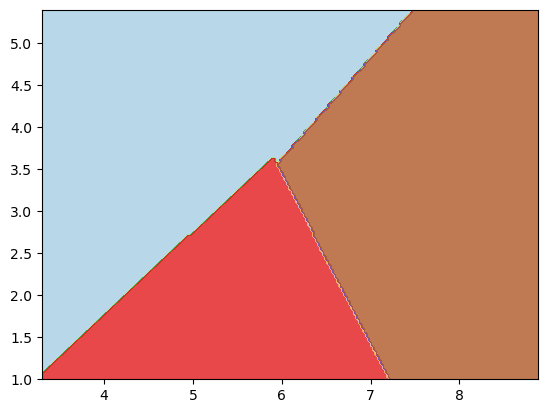

In [6]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

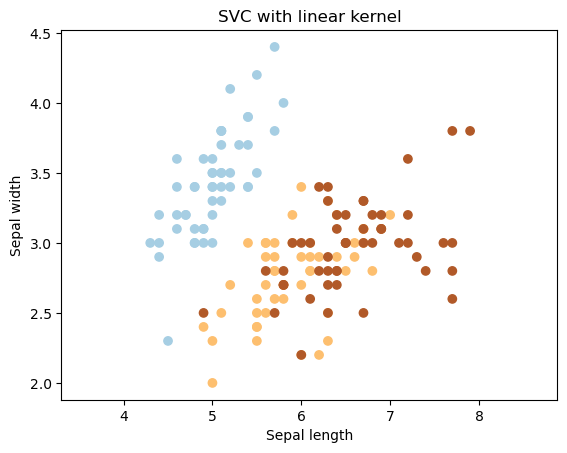

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

Example: Use SVM rbf kernel

Change the kernel type to rbf in below line and look at the impact.

In [12]:
svc = svm.SVC(kernel='rbf', C=1,gamma=0.001).fit(X, y)

I would suggest you go for linear SVM kernel if you have a large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can use RBF but do not forget to cross-validate for its parameters to avoid over-fitting.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

Example: Let’s difference if we have gamma different gamma values like 0, 10 or 100.

C: Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.

We should always look at the cross-validation score to have effective combination of these parameters and avoid over-fitting.

In R, SVMs can be tuned in a similar fashion as they are in Python. Mentioned below are the respective parameters for e1071 package:

* The kernel parameter can be tuned to take “Linear”,”Poly”,”rbf” etc.
* The gamma value can be tuned by setting the “Gamma” parameter.
* The C value in Python is tuned by the “Cost” parameter in R.

Pros and Cons associated with SVM
Pros:
* It works really well with a clear margin of separation
* It is effective in high dimensional spaces.
* It is effective in cases where the number of dimensions is greater than the number of samples.
* It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Cons:
* It doesn’t perform well when we have large data set because the required training time is higher
* It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
* SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.